In [1]:
%pylab inline
from __future__ import division
import scipy as sp
from scipy import stats
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
import operator as op
from decimal import *
# import pickle
# from mpl_toolkits.mplot3d import Axes3D
import mpld3
mpld3.enable_notebook()

Populating the interactive namespace from numpy and matplotlib


In [2]:
%run ../cow.py
%run ../optimize_pkg_2.py

In [3]:
filepath_down = "../data_tables/hs_rs_downlink/n"
filepath_up = "../data_tables/hs_rs_uplink/n"
protocolbit = 4*10**4
protocol_target = 10**(-9)

In [4]:
optimize_3_data = zeros((len(range(2, 36)), 6))
start_node = 2

In [63]:
opt_1_tSNR = np.array([ 47.33 , 33.68 , 26.86 , 22.77 , 20.08 , 18.12 , 16.8 ,  15.71 , 14.97,  14.33,
  13.87 , 13.37 , 13.01 , 13.01 , 12.53 , 12.46 , 12.46 , 12.59 , 12.26 , 12.57,
  12.33 , 12.87 , 12.64 , 13.64 , 13.57 , 13.5 ,  15.26 , 15.44 , 15.58 , 18.38,
  18.48 , 18.62 , 18.77 , 18.82])

opt_1_rSNRdu = opt_1_rSNR3 = np.array([ -0.06  , 0.34 ,  0.71  , 1.03  , 1.33 ,  1.55  , 1.9  ,  2.11  , 2.44 ,  2.68,
2.98,   3.11 ,  3.3 ,   3.8 ,   3.73 ,  4.05  , 4.39  , 4.83 ,  4.77 ,  5.31,
5.28,   5.97 ,  5.95 ,  6.91 ,  6.89 ,  6.87 ,  8.31 ,  8.29  , 8.27,  10.93,
10.92 , 10.92 , 10.92,  10.91])

In [154]:
%run ../optimize_3_dct.py
opt_3_tSNR = tSNR_start.values()
opt_3_rSNRdu = rSNRdu_start.values()
opt_3_rSNR3 = rSNR3_start.values()

print opt_3_tSNR
print '\n'
print opt_3_rSNRdu
print '\n'
print opt_3_rSNR3

[47.1, 33.44, 26.61, 22.51, 19.78, 17.79, 16.42, 15.26, 14.47, 13.77, 13.25, 12.69, 12.27, 12.19, 11.65, 11.53, 11.45, 11.5, 11.11, 11.31, 11.01, 11.38, 11.12, 11.77, 11.54, 11.32, 12.43, 12.24, 12.06, 14.31, 14.15, 14.03, 13.92, 13.85]


[-0.33, -0.17, 0.0, 0.14, 0.28, 0.36, 0.54, 0.62, 0.82, 0.94, 1.09, 1.12, 1.21, 1.52, 1.39, 1.6, 1.78, 2.06, 1.93, 2.26, 2.19, 2.56, 2.53, 3.13, 3.06, 2.98, 3.85, 3.79, 3.71, 5.26, 5.28, 5.25, 5.42, 5.45]


[-0.33, 0.15, 0.57, 0.93, 1.26, 1.5, 1.87, 2.1, 2.44, 2.7, 3.0, 3.15, 3.35, 3.85, 3.79, 4.12, 4.46, 4.91, 4.86, 5.4, 5.38, 6.08, 6.06, 7.03, 7.01, 6.99, 8.43, 8.42, 8.39, 11.04, 11.04, 11.05, 11.07, 11.05]


In [149]:
range_start = 2
range_end = 36
start_node = range_start - 2
end_node = range_end - 2

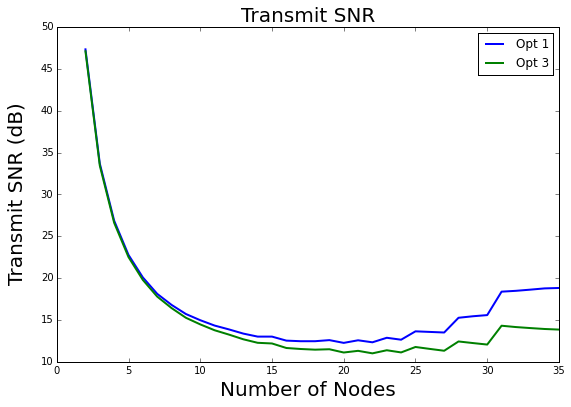

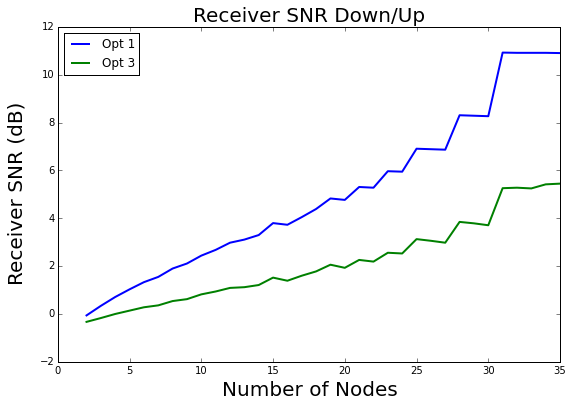

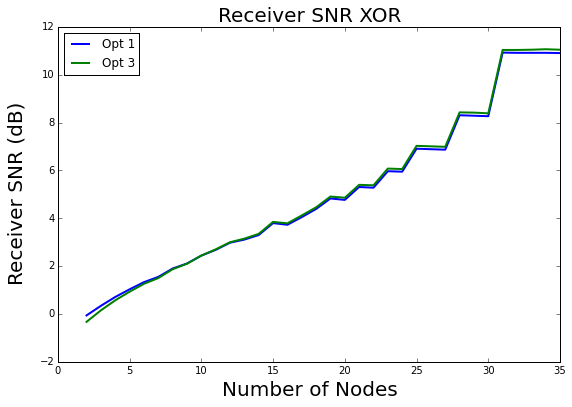

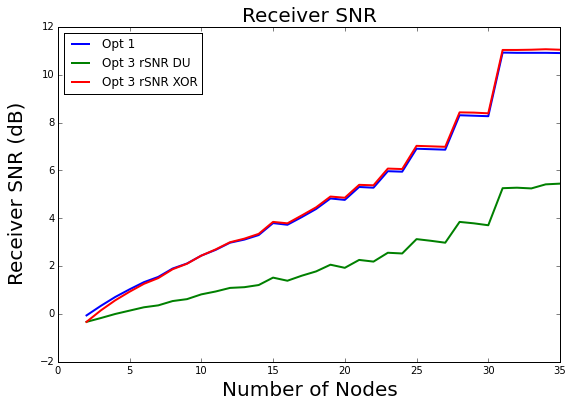

In [155]:
figure(figsize=(9, 6))
plot(range(range_start, range_end), opt_1_tSNR[start_node:end_node], lw=2.0, label='Opt 1')
plot(range(range_start, range_end), opt_3_tSNR[start_node:end_node], lw=2.0, label='Opt 3')
xlabel('Number of Nodes', fontsize=20)
ylabel('Transmit SNR (dB)', fontsize=20, labelpad=15)
title('Transmit SNR', fontsize=20)
legend(loc=0)
savefig('opt_3_tSNR.pdf', bbox='tight')

figure(figsize=(9, 6))
plot(range(range_start, range_end), opt_1_rSNRdu[start_node:end_node], lw=2.0, label='Opt 1')
plot(range(range_start, range_end), opt_3_rSNRdu[start_node:end_node], lw=2.0, label='Opt 3')
xlabel('Number of Nodes', fontsize=20)
ylabel('Receiver SNR (dB)', fontsize=20, labelpad=15)
title('Receiver SNR Down/Up', fontsize=20)
legend(loc=0)
savefig('opt_3_rSNRdu.pdf', bbox='tight')

figure(figsize=(9, 6))
plot(range(range_start, range_end), opt_1_rSNR3[start_node:end_node], lw=2.0, label='Opt 1')
plot(range(range_start, range_end), opt_3_rSNR3[start_node:end_node], lw=2.0, label='Opt 3')
xlabel('Number of Nodes', fontsize=20)
ylabel('Receiver SNR (dB)', fontsize=20, labelpad=15)
title('Receiver SNR XOR', fontsize=20)
legend(loc=0)
savefig('opt_3_rSNR3.pdf', bbox='tight')

figure(figsize=(9, 6))
plot(range(range_start, range_end), opt_1_rSNR3[start_node:end_node], lw=2.0, label='Opt 1')
plot(range(range_start, range_end), opt_3_rSNRdu[start_node:end_node], lw=2.0, label='Opt 3 rSNR DU')
plot(range(range_start, range_end), opt_3_rSNR3[start_node:end_node], lw=2.0, label='Opt 3 rSNR XOR')
xlabel('Number of Nodes', fontsize=20)
ylabel('Receiver SNR (dB)', fontsize=20, labelpad=15)
title('Receiver SNR', fontsize=20)
legend(loc=0)
savefig('opt_3_rSNR.pdf', bbox='tight')

[ 0.23  0.24  0.25  0.26  0.3   0.33  0.38  0.45  0.5   0.56  0.62  0.68
  0.74  0.82  0.88  0.93  1.01  1.09  1.15  1.26  1.32  1.49  1.52  1.87
  2.03  2.18  2.83  3.2   3.52  4.07  4.33  4.59  4.85  4.97]


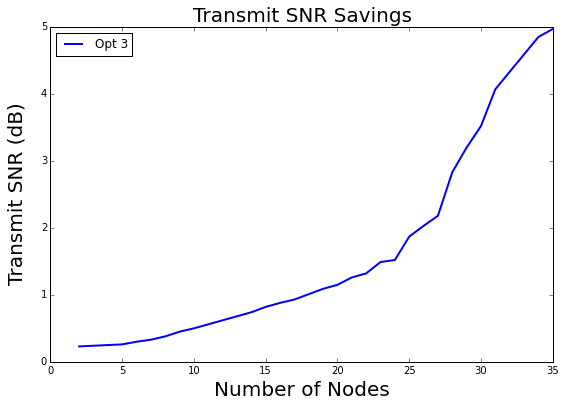

In [156]:
# opt_1_tSNR = np.array(opt_1_tSNR)
print opt_1_tSNR - opt_3_tSNR
# print opt_1_tSNR[19] - opt_3_tSNR[19]

figure(figsize=(9, 6))
plot(range(range_start, range_end), opt_1_tSNR[start_node:end_node]-opt_3_tSNR[start_node:end_node], lw=2.0, label='Opt 3')
# plot(range(range_start, range_end), opt_3_tSNR[start_node:end_node], lw=2.0, label='Opt 3')
xlabel('Number of Nodes', fontsize=20)
ylabel('Transmit SNR (dB)', fontsize=20, labelpad=15)
title('Transmit SNR Savings', fontsize=20)
legend(loc=0)
savefig('opt_3_tSNR_savings.pdf', bbox='tight')

In [130]:
coeffs = np.polyfit(range(range_start, range_end), opt_3_rSNRdu[start_node:end_node], 1)
N = 28
print coeffs[0] * N + coeffs[1]

3.17824615385


In [131]:
coeffs_2 = np.polyfit(range(range_start, range_end), opt_3_rSNRdu[start_node:end_node], 2)
N = 28
print coeffs_2[0] * N**2 + coeffs_2[1] * N + coeffs_2[2]

3.25151538462


In [143]:
N = 31

print opt_1_tSNR[N-2], opt_1_tSNR[28-2]-2.5, opt_1_tSNR[28-2]-3
print opt_1_tSNR[N-1-2]
# print opt_3_tSNR[24-2]
print opt_1_rSNR3[N-2]
print opt_1_rSNR3[N-1-2]
# print opt_3_rSNRdu[24-2]

18.38 12.76 12.26
15.58
10.93
8.27
